In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("steamspy_data.csv")

In [4]:
print(df.columns)

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'languages', 'genre', 'ccu', 'tags'],
      dtype='object')


In [8]:
print(df.head(5))

   appid                       name         developer publisher  score_rank  \
0     10             Counter-Strike             Valve     Valve         NaN   
1     20      Team Fortress Classic             Valve     Valve         NaN   
2     30              Day of Defeat             Valve     Valve         NaN   
3     40         Deathmatch Classic             Valve     Valve         NaN   
4     50  Half-Life: Opposing Force  Gearbox Software     Valve         NaN   

   positive  negative  userscore                    owners  average_forever  \
0    216345      5530          0  10,000,000 .. 20,000,000                0   
1      6472       990          0   5,000,000 .. 10,000,000                0   
2      5686       634          0   5,000,000 .. 10,000,000                0   
3      2242       490          0   5,000,000 .. 10,000,000                0   
4     17468       890          0    2,000,000 .. 5,000,000                0   

   ...  median_forever  median_2weeks  price  init

In [11]:
## Top 10 Unique Developers by Total Reviews

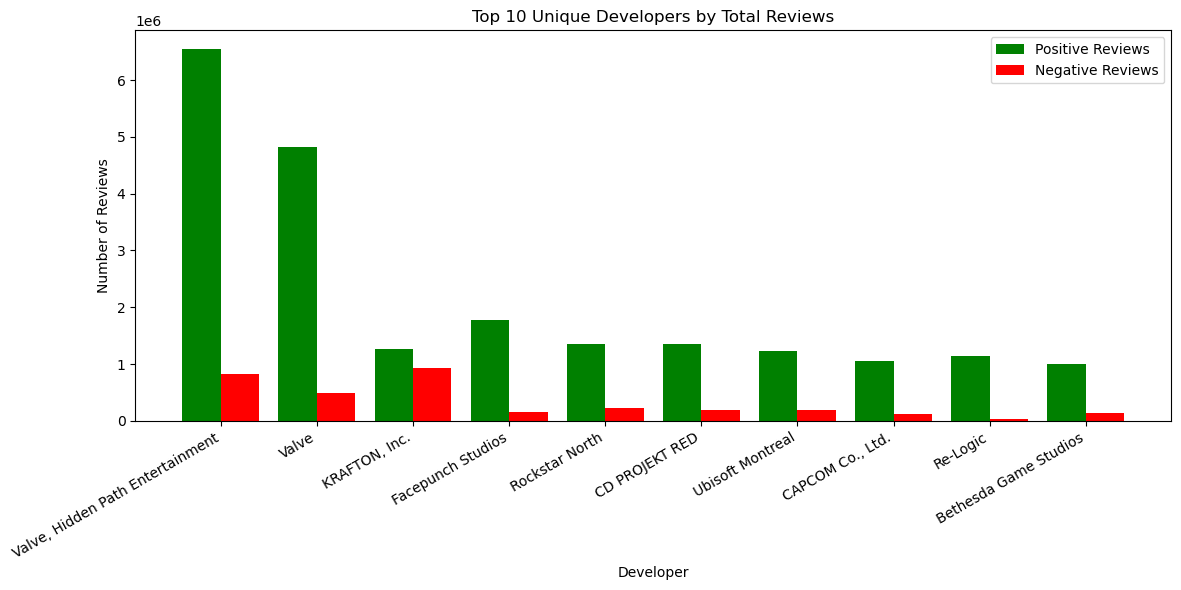

In [7]:
data = df[[ 'developer',  'positive', 'negative']];
# Aggregate total reviews (positive + negative) per developer
df["total_reviews"] = df["positive"] + df["negative"]

df_grouped = df.groupby("developer", as_index=False)[["positive", "negative"]].sum()
df_grouped["total_reviews"] = df_grouped["positive"] + df_grouped["negative"]

# Select the top 10 unique developers by total reviews
top_10_unique_devs = df_grouped.nlargest(10, "total_reviews")

# Bar width
bar_width = 0.4
x = np.arange(len(top_10_unique_devs))  # X positions for bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, top_10_unique_devs["positive"], bar_width, label="Positive Reviews", color="green")
ax.bar(x + bar_width/2, top_10_unique_devs["negative"], bar_width, label="Negative Reviews", color="red")

# Labels & Titles
ax.set_xlabel("Developer")
ax.set_ylabel("Number of Reviews")
ax.set_title("Top 10 Unique Developers by Total Reviews")
ax.set_xticks(x)
ax.set_xticklabels(top_10_unique_devs["developer"], rotation=30, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
## Top 10 Genres by Positive Reviews

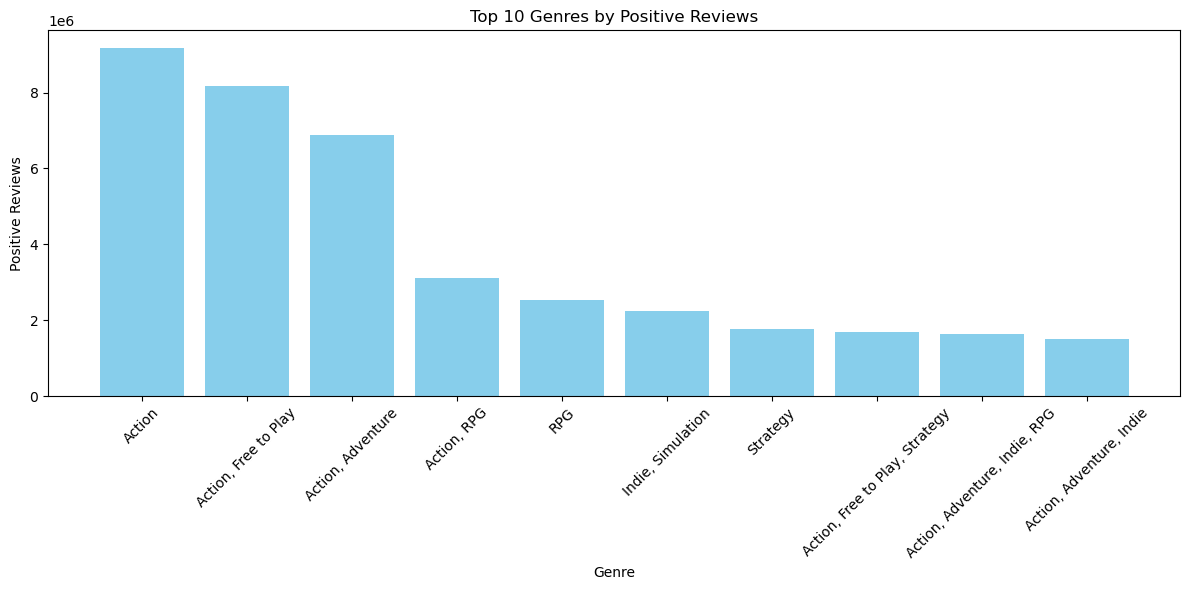

In [17]:
data = df[[ 'genre',  'positive', 'negative']];
aggregated = df.groupby('genre', as_index=False)['positive'].sum()

# Sort the genres in descending order by positive reviews and pick the top 10
top_10_genres = aggregated.sort_values('positive', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres['genre'], top_10_genres['positive'], color='skyblue')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Positive Reviews')
plt.title('Top 10 Genres by Positive Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()